In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Reading the CSV
BankData = pd.read_csv("BankChurners.csv")
BankData

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


__Data Cleanup

In [4]:
# Drop the last two columns as it is not relevant.
BankData.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], inplace=True)
BankData.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], inplace=True)

In [5]:
BankData

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


__Q5: What is the relationship between card cateogry and income? Are those with a higher income on a better card? Who is more likely to stay or leave?


In [18]:
# Selecting the columns needed for the question
Q5_columns = ["Income_Category", "Attrition_Flag", "Card_Category"]
# Creating a dataframe with the columns required
Bank_df = BankData[Q5_columns]
Bank_df

,Income_Category,Attrition_Flag,Card_Category
0,$60K - $80K,Existing Customer,Blue
1,Less than $40K,Existing Customer,Blue
2,$80K - $120K,Existing Customer,Blue
3,Less than $40K,Existing Customer,Blue
4,$60K - $80K,Existing Customer,Blue
...,...,...,...
10122,$40K - $60K,Existing Customer,Blue
10123,$40K - $60K,Attrited Customer,Blue
10124,Less than $40K,Attrited Customer,Blue
10125,$40K - $60K,Attrited Customer,Blue


In [45]:
#Stats. Majority of the customers earn less than $40K (3,561 customers). Blue card is the most common (9,436 customers).
Bank_df.describe()

,Income_Category,Attrition_Flag,Card_Category
count,10127,10127,10127
unique,6,2,4
top,Less than $40K,Existing Customer,Blue
freq,3561,8500,9436


__Comparison of card category and income

In [32]:
#Counting the number of clients in each income category
BankData["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [33]:
#Counting the number of clients in each Card category
BankData["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

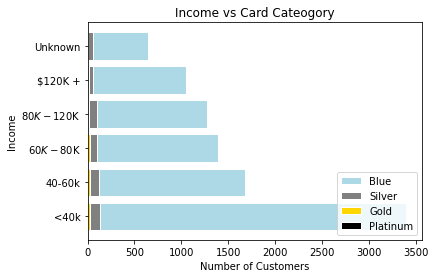

In [19]:
# Creating four datesets based on card category

blue = Bank_df.loc[Bank_df["Card_Category"] == "Blue"]
silver = Bank_df.loc[Bank_df["Card_Category"] == "Silver"]
gold = Bank_df.loc[Bank_df["Card_Category"] == "Gold"]
platinum = Bank_df.loc[Bank_df["Card_Category"] == "Platinum"]

# Getting the number of customers for each card category per income category

blueplot = blue["Income_Category"].value_counts()
silverplot = silver["Income_Category"].value_counts()
goldplot = gold["Income_Category"].value_counts()
platinumplot = platinum["Income_Category"].value_counts()
card_category = ["Blue","Silver","Gold","Platinum"]

#Establishing bar width, axis and title labels
number_ofy = [0,1,2,3,4,5]
labely = ['<40k','40-60k','$60K - $80K','$80K - $120K','$120K +','Unknown']
Width = 2
plt.yticks(number_ofy, labely)
plt.ylabel('Income')
plt.xlabel('Number of Customers')
plt.title("Income vs Card Cateogory")

#Plotting the bars
plt.barh(number_ofy, blueplot,color='lightblue',edgecolor='white')
plt.barh(number_ofy, silverplot,color='grey',edgecolor='white')
plt.barh(number_ofy, goldplot,color='gold',edgecolor='white')
plt.barh(number_ofy, platinumplot,color='black',edgecolor='white')

plt.legend(card_category,loc=4)
plt.show()

Figure 1: Stacked bar chart showing a comparison between income and card category. Blue card was the most common across all income categories. Results suggest that the lower the income, the higher the number of customers with a blue card.

In [28]:
blueplot

Less than $40K    3403
$40K - $60K       1675
$80K - $120K      1395
$60K - $80K       1273
Unknown           1045
$120K +            645
Name: Income_Category, dtype: int64

In [29]:
silverplot

Less than $40K    130
$80K - $120K      117
$40K - $60K        99
$60K - $80K        96
$120K +            60
Unknown            53
Name: Income_Category, dtype: int64

In [30]:
goldplot

$60K - $80K       29
Less than $40K    24
$80K - $120K      21
$120K +           18
$40K - $60K       15
Unknown            9
Name: Income_Category, dtype: int64

In [31]:
platinumplot

Unknown           5
$60K - $80K       4
Less than $40K    4
$120K +           4
$80K - $120K      2
$40K - $60K       1
Name: Income_Category, dtype: int64

__Comparison of card category and attrition

In [24]:
#Counting the number of existing and attrited clients
BankData["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

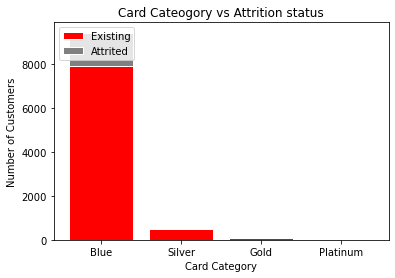

In [34]:
# Creating two datesets based on card category

existing_cust = Bank_df.loc[Bank_df["Attrition_Flag"] == "Existing Customer"]
attrited_cust = Bank_df.loc[Bank_df["Attrition_Flag"] == "Attrited Customer"]

# Getting the number of customers for each card category per attrition status
Existingplot = existing_cust["Card_Category"].value_counts()
Attritedplot = attrited_cust["Card_Category"].value_counts()
att_flag = ["Existing", "Attrited"]

#Establishing bar width, axis and title labels
number_ofx = [0,1,2,3]
labelx = ['Blue','Silver','Gold','Platinum']
Width = 2
plt.xticks(number_ofx, labelx)
plt.ylabel('Number of Customers')
plt.xlabel('Card Category')
plt.title("Card Cateogory vs Attrition status")

plt.bar(number_ofx, Existingplot,color='red',edgecolor='white')
plt.bar(number_ofx, Attritedplot,color='grey',edgecolor='white',bottom=Existingplot)

plt.legend(att_flag,loc=2)
plt.show()

Figure 2: Stacked bar chart showing comparison between attrition status and card category.

In [35]:
totalattrited = np.sum(Attritedplot)
totalattrited

1627

In [36]:
#Calculating percentages for Attrited customers
BlueAttrited= (Attritedplot['Blue'] / totalattrited *100)
BlueAttrited

93.3620159803319

In [37]:
SilverAttrited= (Attritedplot['Silver'] / totalattrited *100)
SilverAttrited

5.039950829748002

In [38]:
GoldAttrited= (Attritedplot['Gold'] / totalattrited *100)
GoldAttrited

1.290719114935464

In [39]:
PlatinumAttrited= (Attritedplot['Platinum'] / totalattrited *100)
PlatinumAttrited

0.30731407498463426

In [40]:
totalexisting = np.sum(Existingplot)
totalexisting

8500

In [41]:
#Calculating percentages for Existing customers
BlueExisting= (Existingplot['Blue'] / totalexisting *100)
BlueExisting

93.14117647058823

In [42]:
SilverExisting= (Existingplot['Silver'] / totalexisting *100)
SilverExisting

5.564705882352941

In [43]:
GoldExisting= (Existingplot['Gold'] / totalexisting *100)
GoldExisting

1.1176470588235294

In [44]:
PlatinumExisting= (Existingplot['Platinum'] / totalexisting *100)
PlatinumExisting

0.17647058823529413